In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import comb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    GridSearchCV,
    train_test_split
)

In [ ]:
X,y = load_breast_cancer(return_X_y=True, as_frame = True)
y = y.map({0:1, 1:0})

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [ ]:
logit = LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear', random_state = 4, max_iter=1000)

param_grid = dict(
    penalty = ['l1', 'l2'],
    C = [0.1, 1, 10]
)

#K-Fold CV

kf = KFold(n_splits = 5, shuffle = True, random_state = 4)

clf = GridSearchCV(
    logit,
    param_grid,
    cv = kf,
    refit = True,
    scoring = 'accuracy',
    return_train_score=True,
)

search = clf.fit(X_train, y_train)
search.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(results.shape)
results.head()

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919620,0.012606
1,"{'C': 0.1, 'penalty': 'l2'}",0.934747,0.019812
2,"{'C': 1, 'penalty': 'l1'}",0.944810,0.024360
3,"{'C': 1, 'penalty': 'l2'}",0.944778,0.025651
4,"{'C': 10, 'penalty': 'l1'}",0.947247,0.014592


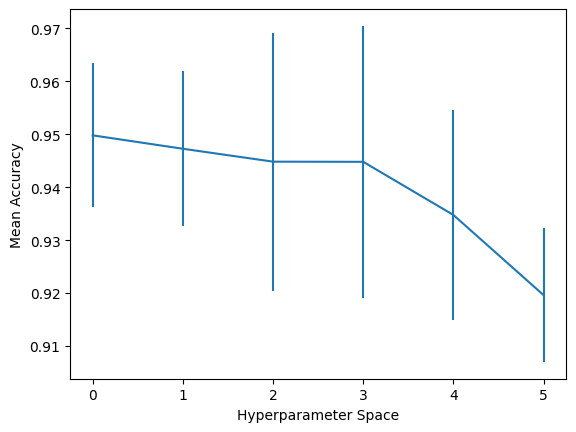

In [ ]:
results.sort_values(by = 'mean_test_score', ascending = False,inplace=True)
results.reset_index(drop = True, inplace = True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']],subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')
plt.show()

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9623115577889447
Test Accuracy: 0.9532163742690059


In [ ]:
# Repeated K-Fold
logit = LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear', random_state = 4, max_iter=1000)

param_grid = dict(
    penalty = ['l1', 'l2'],
    C = [0.1, 1, 10]
)

#K-Fold CV

rkf = RepeatedKFold(n_splits = 5, n_repeats=10, random_state = 4)

clf = GridSearchCV(
    logit,
    param_grid,
    cv = kf,
    refit = True,
    scoring = 'accuracy',
    return_train_score=True,
)

search = clf.fit(X_train, y_train)
search.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(results.shape)
results.head()

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919620,0.012606
1,"{'C': 0.1, 'penalty': 'l2'}",0.934747,0.019812
2,"{'C': 1, 'penalty': 'l1'}",0.944810,0.024360
3,"{'C': 1, 'penalty': 'l2'}",0.944778,0.025651
4,"{'C': 10, 'penalty': 'l1'}",0.947247,0.014592


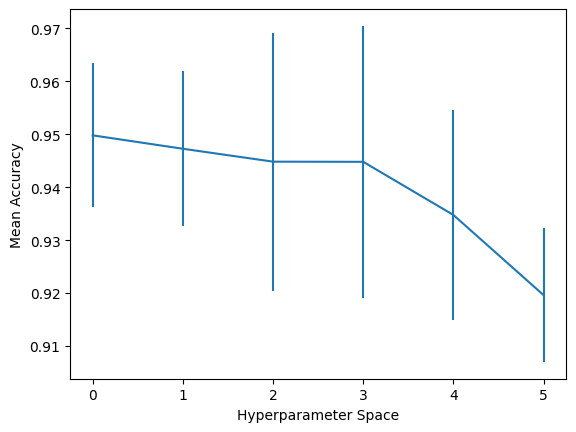

In [ ]:
results.sort_values(by = 'mean_test_score', ascending = False,inplace=True)
results.reset_index(drop = True, inplace = True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']],subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')
plt.show()

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9623115577889447
Test Accuracy: 0.9532163742690059


In [ ]:
#Leave_One-Out
logit = LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear', random_state = 4, max_iter=1000)

param_grid = dict(
    penalty = ['l1', 'l2'],
    C = [0.1, 1, 10]
)

loo = LeaveOneOut()

clf = GridSearchCV(
    logit,
    param_grid,
    cv = loo,
    refit = True,
    scoring = 'accuracy',
    return_train_score=True,
)

search = clf.fit(X_train, y_train)
search.best_params_

{'C': 10, 'penalty': 'l1'}

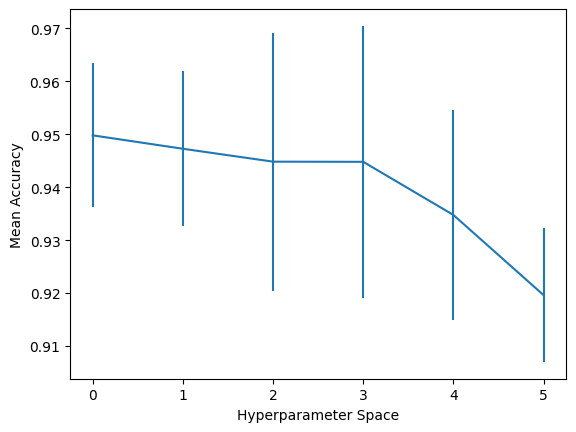

In [ ]:
results.sort_values(by = 'mean_test_score', ascending = False,inplace=True)
results.reset_index(drop = True, inplace = True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']],subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')
plt.show()

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9748743718592965
Test Accuracy: 0.9707602339181286


In [ ]:
logit = LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear', random_state = 4, max_iter=1000)

param_grid = dict(
    penalty = ['l1', 'l2'],
    C = [0.1, 1, 10]
)

lpo = LeavePOut(p=2)

clf = GridSearchCV(
    logit,
    param_grid,
    cv = lpo,
    refit = True,
    scoring = 'accuracy',
    return_train_score=True,
)

search = clf.fit(X_train, y_train)
search.best_params_

NameError: name 'LogisticRegression' is not defined

In [ ]:
results.sort_values(by = 'mean_test_score', ascending = False,inplace=True)
results.reset_index(drop = True, inplace = True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']],subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')
plt.show()

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

In [ ]:
#Stratified K-Fold
logit = LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear', random_state = 4, max_iter=1000)

param_grid = dict(
    penalty = ['l1', 'l2'],
    C = [0.1, 1, 10]
)

#K-Fold CV

skf =StratifiedKFold(n_splits = 5, n_repeats=10, random_state = 4)

clf = GridSearchCV(
    logit,
    param_grid,
    cv = skf,
    refit = True,
    scoring = 'accuracy',
    return_train_score=True,
)

search = clf.fit(X_train, y_train)
search.best_params_